In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib as mpl
from matplotlib import pyplot as plt
import functions as fn
import box
import halo
import my_rc_params

In [2]:
z = 0
x_bins = np.logspace(-2, 0, 21)
m_bins = np.logspace(10.5, 14, 11)
k = np.logspace(-1, 2, 30)
bin_no = 7
model = 'ModM2E-4P5'

In [3]:
x = np.sqrt(x_bins[:-1]*x_bins[1:])
m = np.sqrt(m_bins[:-1]*m_bins[1:])
log_m = np.log10(m)

In [4]:
box_f = box.Box(fn.BOX_PATH, fn.SHOT[z])

In [5]:
df = pd.read_csv(fn.HERE_PATH/'Density_Profiles'/f'box_z{z}.csv')
halo_mass = np.array(df.iloc[:,1])
print(f'Read in {halo_mass.shape[0]} halos')
halo_density = np.array(df.iloc[:, 2:-1]) * 1e9
halo_r200c = np.array(df.iloc[:,-1]) * 1e-3
pos = np.array([0,0,0])
halos = [halo.Halo(pos, r200c) for r200c in halo_r200c]
for i, halo_f in enumerate(halos):
    halo_f.mass = halo_mass[i]
    halo_f.density = halo_density[i,:]

Read in 5908 halos


In [6]:
avg_halos, no_halos = fn.get_mass_avg_density(halos, m_bins)
for i, n in enumerate(no_halos):
    print(f'{n} in 10^{log_m[i]}')

2571.0 in 10^10.675
1260.0 in 10^11.025
632.0 in 10^11.375
357.0 in 10^11.725000000000001
170.0 in 10^12.075000000000001
74.0 in 10^12.425
40.0 in 10^12.775
17.0 in 10^13.125
6.0 in 10^13.475000000000001
3.0 in 10^13.825000000000001


In [7]:
df = pd.read_csv(fn.HERE_PATH/'Power_Spectra'/f'box_z{z}.csv')
p_1h = np.array(df.iloc[:,1])

In [8]:
pivot_halos = np.array([])
pivot_p_1h = np.array([])
for i, x_pivot in enumerate(x[1:-1]):
    print(i)
    pivot_halos = np.append(pivot_halos, copy.deepcopy(avg_halos[bin_no]))
    pivot_halos[-1].pivot(x, x_pivot)
    model_halos = avg_halos.copy()
    model_halos[bin_no] = pivot_halos[-1]

    with open(fn.HERE_PATH/'Pivot_Density_Profiles'/f'z{z}_b{bin_no}_x{round(np.log10(x_pivot),2)}.csv', 'w') as f:
        f.write('rho\n')
        np.savetxt(f, pivot_halos[-1].density, delimiter=',')
    [halo.get_u(x,k) for halo in model_halos]

    pivot_p_1h = np.append(pivot_p_1h, fn.get_power(box_f, model_halos, k, m_bins, z, no_halos))

pivot_p_1h = np.reshape(pivot_p_1h, [x[1:-1].shape[0], k.shape[0]])

for i, x_pivot in enumerate(x[1:-1]):
    with open(fn.HERE_PATH/'Pivot_Power_Spectra'/f'z{z}_b{bin_no}_x{round(np.log10(x_pivot),2)}.csv', 'w') as f:
        f.write('P\n')
        np.savetxt(f, pivot_p_1h[i,:], delimiter=',')

0


/data/ERCblackholes4/eac83/FABLE_S8/functions.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hist = np.array(np.histogram(mass, bins=m_bins))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


/tmp/ipykernel_195821/4119420013.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', x[-10:-1].shape[0])
/tmp/ipykernel_195821/4119420013.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[0].loglog()
/tmp/ipykernel_195821/4119420013.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[0].set_xticklabels([])


[-0.95 -0.85 -0.75 -0.65 -0.55 -0.45 -0.35 -0.25 -0.15]
0
1
2
3
4
5
6
7
8


/tmp/ipykernel_195821/4119420013.py:67: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fg.colorbar(cax, ticks=c[:], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_195821/4119420013.py:68: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar2 = fg2.colorbar(cax, ticks=c[:], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
/tmp/ipykernel_195821/4119420013.py:33: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 2*np.pi/x
/tmp/ipykernel_195821/41194

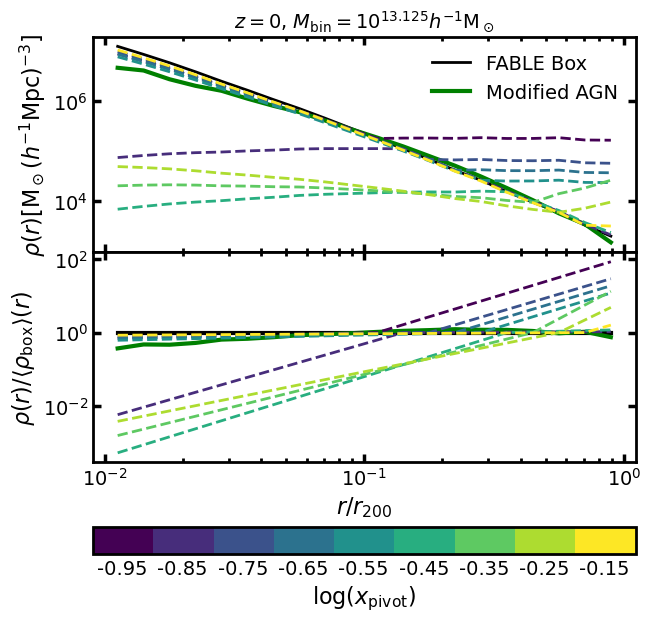

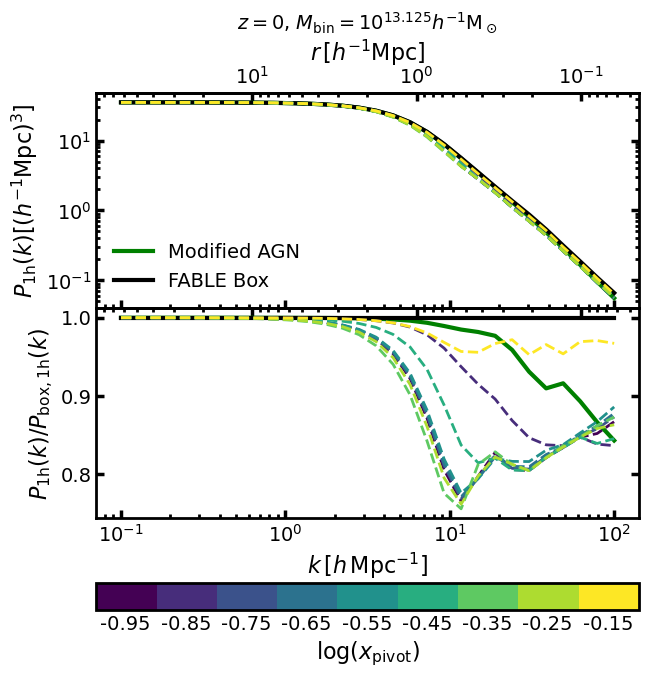

In [9]:
fg, ax = plt.subplots(2, figsize=(7,7), gridspec_kw={'height_ratios':[2,3]})
fg.subplots_adjust(hspace=0)
df = pd.read_csv(fn.HERE_PATH/'Density_Profiles'/f'{model}_z{z}.csv')
density_model = np.array(df.iloc[:,2:-1]).T
df = pd.read_csv(fn.HERE_PATH/'Power_Spectra'/f'{model}_unnorm_z{z}.csv')
P_1h_model = np.array(df.iloc[:,1])

cmap = mpl.cm.get_cmap('viridis', x[-10:-1].shape[0])
c=np.log10(x[-10:-1])
print(c)
cax = ax[0].scatter(c,c,c=c,cmap=cmap)
ax[0].cla()

ax[0].loglog()
ax[1].loglog()
ax[0].set_ylabel(r'$\rho(r)[\mathrm{M}_\odot(h^{-1}\mathrm{Mpc})^{-3}]$')
ax[1].set_xlabel(r'$r/r_{200}$')
ax[1].set_ylabel(r'$\rho(r)/\langle\rho_\mathrm{box}\rangle(r)$')
ax[0].set_title(f'$z = {z}$, $M_\mathrm{{bin}} = 10^{{{round(log_m[bin_no], 3)}}} h^{{-1}} \mathrm{{M}}_\odot$')
ax[0].set_xticklabels([])
fg2, ax2 = plt.subplots(2, figsize=(7,7), gridspec_kw={'height_ratios':[2,3]})
fg2.subplots_adjust(hspace=0)
ax2[0].loglog()
ax2[1].semilogx()
ax2[0].set_ylabel(r'$P_\mathrm{1h}(k)[(h^{-1}\mathrm{Mpc})^{3}]$')
ax2[1].set_xlabel(r'$k \, [h \, \mathrm{Mpc}^{-1}]$')
ax2[1].set_ylabel(r'$P_\mathrm{1h}(k)/P_\mathrm{box,1h}(k)$')
ax2[0].set_title(f'$z = {z}$, $M_\mathrm{{bin}} = 10^{{{round(log_m[bin_no], 3)}}} h^{{-1}} \mathrm{{M}}_\odot$')
ax2[0].set_xticklabels([])
ax2[0].tick_params(which='both', top=False)
ax2[1].tick_params(which='both', top=False)

f = lambda x: 2*np.pi/x

Ax2 = ax2[0].secondary_xaxis('top', functions=(f,f))
Ax2.set_xlabel(r'$r \, [h^{-1}\mathrm{Mpc}]$')

Ax3 = ax2[1].secondary_xaxis('top', functions=(f,f))
Ax3.set_xticklabels([])

ax[0].plot(x, avg_halos[bin_no].density, 'k', lw=2, label='FABLE Box')
ax[1].plot(x, avg_halos[bin_no].density/avg_halos[bin_no].density, 'k', lw=3)

ax[0].plot(x, density_model, lw=3, c=fn.COLORS[model], label='Modified AGN')
ax[1].plot(x, np.divide(density_model.T,(avg_halos[bin_no].density.T)).T, lw=3, c=fn.COLORS[model])

ax2[0].plot(k, P_1h_model, lw=3, c=fn.COLORS[model], label='Modified AGN')
ax2[1].plot(k, P_1h_model/p_1h, lw=3, c=fn.COLORS[model])

ax2[0].plot(k, p_1h, 'k', lw=3, label='FABLE Box')
ax2[1].plot(k, p_1h/p_1h, 'k', lw=3)

for i, x_pivot in enumerate(x[10:-1]):
    print(i)
    df_dens = pd.read_csv(fn.HERE_PATH/'Pivot_Density_Profiles'/f'z{z}_b{bin_no}_x{round(np.log10(x_pivot),2)}.csv')
    pivot_density = np.array(df_dens.iloc[:])[:,0]
    df_p_1h = pd.read_csv(fn.HERE_PATH/'Pivot_Power_Spectra'/f'z{z}_b{bin_no}_x{round(np.log10(x_pivot),2)}.csv')
    pivot_p_1h = np.array(df_p_1h.iloc[:])[:,0]
    ax[0].plot(x, pivot_density, '--', linewidth=2, c=cmap(i))
    ax[1].plot(x, (pivot_density/avg_halos[bin_no].density.T).T, '--', c=cmap(i), linewidth=2)
    ax2[0].plot(k, pivot_p_1h, '--', linewidth=2, c=cmap(i))
    ax2[1].plot(k, pivot_p_1h/p_1h, '--', c=cmap(i), linewidth=2)

ax[0].legend()
ax2[0].legend()

cbar = fg.colorbar(cax, ticks=c[:], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)
cbar2 = fg2.colorbar(cax, ticks=c[:], orientation='horizontal', label=r'$\log(x_\mathrm{pivot})$', pad=0.2)

tick_locs = (c-0.07)*(c.shape[0]-1)/(c.shape[0])
cbar.set_ticks(tick_locs)
cbar2.set_ticks(tick_locs)
cbar.set_ticklabels(np.round(c,2))
cbar2.set_ticklabels(np.round(c,2))
cbar.ax.tick_params(size=0)
cbar2.ax.tick_params(size=0)

fg.savefig(fn.HERE_PATH/'Pivot_Plots'/f'dens_z{z}_b{bin_no}.pdf', bbox_inches='tight')
fg2.savefig(fn.HERE_PATH/'Pivot_Plots'/f'p1h_z{z}_b{bin_no}.pdf', bbox_inches='tight')

In [10]:
print(c)

[-0.95 -0.85 -0.75 -0.65 -0.55 -0.45 -0.35 -0.25 -0.15]
